In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
%matplotlib inline

from sklearn import model_selection, datasets
np.random.seed()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cq as cq

import kq as kq
from qiskit import IBMQ
import numpy as np
import networkx as nx
from qiskit.providers.aer.noise import NoiseModel
from qiskit.tools.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit import execute, QuantumCircuit
from qiskit.tools.monitor import job_monitor
import pickle
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

# Dataset has been provided.

In [10]:
# Iris dataset is a binary dataset, it has two classes, 0 and 1, and each of them has 50 instances. 
iris = datasets.load_iris()
data_vectors = iris.data[25:75]
y = iris.target[25:75]
print('number of class 0 is: '+ str(y.tolist().count(0)) + ' (in blue below)')
print('number of class 1 is: '+ str(y.tolist().count(1)) + ' (in orange below)')

# Put data into a structure called 'dataframe' for further use.
iris_df = pd.DataFrame(iris['data'][25:75], columns=iris['feature_names'][0:50])
iris_df['label'] = iris['target'][25:75]
iris_df

number of class 0 is: 25 (in blue below)
number of class 1 is: 25 (in orange below)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.0,3.0,1.6,0.2,0
1,5.0,3.4,1.6,0.4,0
2,5.2,3.5,1.5,0.2,0
3,5.2,3.4,1.4,0.2,0
4,4.7,3.2,1.6,0.2,0
5,4.8,3.1,1.6,0.2,0
6,5.4,3.4,1.5,0.4,0
7,5.2,4.1,1.5,0.1,0
8,5.5,4.2,1.4,0.2,0
9,4.9,3.1,1.5,0.2,0


### We can see that the dataset we use has two classes and is in 4-D.

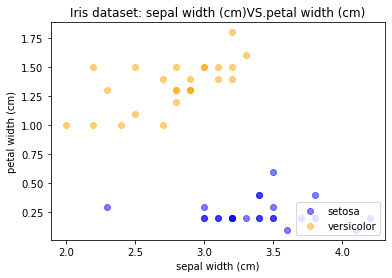

In [11]:
cq.plot_scatter(iris_df,D1='sepal width (cm)',D2 = 'petal width (cm)')

# Now, follow our code and construct your own.